In [1]:
import numpy as np
import random
import warnings
import copy
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('return.csv')
df = df.drop(columns=['Date'], axis=1)
df = df.iloc[::-1].iloc[:60]
print(df.shape)
df.head()

(60, 17)


,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
1122,0.98,-7.42,-12.09,-5.37,-3.40,-9.68,-0.62,1.34,-15.41,1.17,-2.50,4.25,0.54,4.82,1.62,-2.42,1.77
1121,2.98,8.75,6.25,7.06,0.98,1.20,3.79,-0.15,0.35,1.29,4.48,4.92,-2.12,3.64,1.41,2.41,2.65
1120,1.00,3.25,0.49,4.12,0.70,3.75,2.54,-0.33,6.07,3.82,3.20,3.07,3.83,-2.50,2.56,5.46,4.98
1119,-1.59,0.90,-2.11,-1.65,4.55,-2.26,2.83,2.22,3.52,0.19,3.50,5.80,-0.89,-1.49,0.03,3.15,3.27
1118,0.73,3.09,3.77,8.92,-1.04,5.47,0.34,3.13,6.74,0.39,3.77,5.02,1.37,3.63,0.01,2.39,0.41


In [24]:
correlacion = df.corr()
cor = correlacion.values
np.fill_diagonal(cor, 0)

In [25]:
media = np.mean(cor, axis=0)

In [29]:
sum(media < 0.60)

10

In [30]:
a = average < 0.6
porfolio = (df.values/100)
porfolio = porfolio[:, a]
porfolio
covPopulation = np.cov(porfolio.T)

In [39]:
a

array([ True,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False])

In [31]:
#porfolio = (df.values/100)
average = np.median(porfolio,axis=0)
covPopulation = np.cov(porfolio.T)
#average

In [7]:
def genPopulation(nPopulation,k):
    population = []
    for i in range(nPopulation):
        a = np.random.randint(0,2,average.shape[0])
        population.append(a*np.random.randint(k, size=average.shape[0]));
    return np.array(population);

In [8]:
def getRisk(population,covPopulation):
    riskPopulation = []
    for popu in population:
        popu = popu/popu.sum()
        W = popu.reshape(-1,1)
        matPopulation = W@W.T
        result2 = matPopulation*covPopulation
        riskPopulation.append(np.sqrt(np.sum(result2)))
    return(riskPopulation)

In [9]:
def getReturn(average, population):
    return population@average

In [10]:
def validateArray(i,k):
    if i!=0:
        return 0
    else:
        return random.randint(1,k)

In [11]:
def mutar(descendencia, k, n_variables, prob_mut=0.01, verbose=False):

    # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
    # ----------------------------------------------------------------------
    if prob_mut < 0 or prob_mut > 1:
        raise Exception(
            "El argumento prob_mut debe de estar en el rango [0,1]."
        )

    # SELECCIÓN PROBABILISTA DE POSICIONES (VARIABLES) QUE MUTAN
    #-----------------------------------------------------------------------
    posiciones_mutadas = np.random.uniform(
                            low=0,
                            high=1,
                            size=n_variables
                         )
    posiciones_mutadas = posiciones_mutadas < prob_mut

    # Se modifican las posiciones de la secuencia del individuo que coinciden 
    # con las posiciones_mutadas.
    descendencia[posiciones_mutadas] = [ validateArray(i,k) for i in descendencia[posiciones_mutadas]]
    
    # Todo individuo debe tener como mínimo 1 predictor, si como consecuencia de la 
    # mutación, ningun valor de la secuencia es True, se selecciona una posición
    # aleatoria y se sobreescribe con True.

    if sum(descendencia) == 0:
        indice = np.random.choice(
                    a       = np.arange(n_variables),
                    size    = 1, 
                    replace = 0
                  )
        descendencia[indice] = random.randint(1,k-1)


    # INFORMACIÓN DEL PROCESO (VERBOSE)
    # ----------------------------------------------------------------------
    if verbose:
        print("El individuo ha sido mutado")
        print("---------------------------")
        print("Total mutaciones: " + str(np.sum(posiciones_mutadas)))
        print("Secuencia: " + str(descendencia))
        print("Índice predictores: " + str(descendencia))
        print("")  


In [12]:
def cruzar_individuos(parental_1, parental_2, n_individuos, population,k,metodo_cruce = "uniforme",
                          verbose=False):

        # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
        # ----------------------------------------------------------------------
        if parental_1 not in np.arange(n_individuos):
            raise Exception(
                "El índice del parental_1 debe de ser un valor entre 0 y " +
                "el número de individuos de la población."
                )
        if parental_2 not in np.arange(n_individuos):
            raise Exception(
                "El índice del parental_2 debe de ser un valor entre 0 y " +
                "el número de individuos de la población."
                )

        if metodo_cruce not in ["uniforme", "punto_simple"]:
            raise Exception(
                "El argumento metodo_cruce debe de ser" +
                "uniforme o punto_simple."
                )

        # CREACIÓN DE LA DESCENDENCIA
        # ----------------------------------------------------------------------
        # Se extraen los parentales acorde a los índices indicados.
        parental_1 = population[parental_1]
        parental_2 = population[parental_2]

        
        # Se clona uno de los parentales para utilizarlo como plantilla del nuevo
        # individuo.
        descendencia = copy.deepcopy(parental_1)
        secuencia = np.repeat(None, len(descendencia))

        if metodo_cruce == "uniforme":
            # Se seleccionan aleatoriamente las posiciones que se heredan del
            # parental_1 y del parental 2.
            herencia_parent_1 = np.random.choice(
                                    a       = [True, False],
                                    size    = len(descendencia),
                                    p       = [0.5, 0.5],
                                    replace = True
                                )
            herencia_parent_2 = np.logical_not(herencia_parent_1)

            # Se transfieren los valores al nuevo individuo.
            secuencia[herencia_parent_1] \
                = parental_1[herencia_parent_1]

            secuencia[herencia_parent_2] \
                = parental_2[herencia_parent_2]
            
        if metodo_cruce == "punto_simple":
            punto_cruce  = np.random.choice(
                            a = np.arange(1, len(descendencia) - 1),
                            size = 1
                            )
            punto_cruce = punto_cruce[0]
            secuencia = np.hstack(   
                                        (parental_1[:punto_cruce],
                                        parental_2[punto_cruce:])
                                    )
            
        # Todo individuo debe tener como mínimo 1 predictor, si como consecuencia del 
        # cruzamiento, ningun valor de la secuencia es True, se selecciona una posición
        # aleatoria y se sobreescribe con True.
        if sum(secuencia) == 0:
            indice = np.random.choice(
                        a       = np.arange(len(descendencia)),
                        size    = 1, 
                        replace = 0
                      )
            secuencia[indice] = random.randint(1,k-1)

        secuencia = secuencia.astype('int')
        descendencia = copy.deepcopy(secuencia)
            
        

        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("---------------")
            print("Cruce realizado")
            print("---------------")
            print("")

        return(descendencia)



In [13]:
def seleccionar_individuo(n, n_individuos,average, population, return_indices=True,
                          metodo_seleccion="tournament", verbose=False):
    # COMPROBACIONES INICIALES: EXCEPTIONS Y WARNINGS
    # ----------------------------------------------------------------------
    if metodo_seleccion not in ["ruleta", "rank", "tournament"]:
        raise Exception(
            "El método de selección debe de ser ruleta, rank o tournament."
            )

    # SELECCIÓN DE INDIVIDUOS
    # ----------------------------------------------------------------------
    # Se crea un array con el fitness de cada individuo de la población.
    array_fitness = getReturn(average,population)
    array_risk = getRisk(population, covPopulation)

    if metodo_seleccion == "ruleta":

        probabilidad_seleccion = array_fitness / np.sum(array_fitness)
        ind_seleccionado = np.random.choice(
                                a       = np.arange(n_individuos),
                                size    = n,
                                p       = list(probabilidad_seleccion),
                                replace = True
                           )
    elif metodo_seleccion == "rank":
        ranks = rankdata(-1*array_fitness)
        probabilidad_seleccion = 1 / ranks
        probabilidad_seleccion = probabilidad_seleccion / np.sum(probabilidad_seleccion)
        ind_seleccionado = np.random.choice(
                            a       = np.arange(self.n_individuos),
                            size    = n,
                            p       = list(probabilidad_seleccion),
                            replace = True
                        )
    elif metodo_seleccion == "tournament":
        ind_seleccionado = np.repeat(None,n)
        for i in np.arange(n):
            # Se seleccionan aleatoriamente dos parejas de individuos.
            candidatos_a = np.random.choice(
                            a       = np.arange(n_individuos),
                            size    = 2,
                            replace = False
                        )
            candidatos_b = np.random.choice(
                            a       = np.arange(n_individuos),
                            size    = 2,
                            replace = False
                        )
            # De cada pareja se selecciona el de mayor fitness.
            if array_fitness[candidatos_a[0]] > array_fitness[candidatos_a[1]]:
                ganador_a = candidatos_a[0]
            elif array_fitness[candidatos_a[0]] == array_fitness[candidatos_a[1]]:
                if array_risk[candidatos_a[0]] < array_risk[candidatos_a[1]]:
                    ganador_a = candidatos_a[0]
                else:
                    ganador_a = candidatos_a[1]
            else:
                ganador_a = candidatos_a[1]

            if array_fitness[candidatos_b[0]] > array_fitness[candidatos_b[1]]:
                ganador_b = candidatos_b[0]
            elif array_fitness[candidatos_b[0]] == array_fitness[candidatos_b[1]]:
                if array_risk[candidatos_b[0]] < array_risk[candidatos_b[1]]:
                    ganador_b = candidatos_b[0]
                else: 
                    ganador_b = candidatos_b[1]
            else:
                ganador_b = candidatos_b[1]

            # Se comparan los dos ganadores de cada pareja.
            if array_fitness[ganador_a] > array_fitness[ganador_b]:
                ind_final = ganador_a
            elif array_fitness[ganador_a] == array_fitness[ganador_b]:
                if array_risk[ganador_a] < array_risk[ganador_b]:
                    ind_final = ganador_a
                else: 
                    ind_final = ganador_b
            else:
                ind_final = ganador_b

            ind_seleccionado[i] = ind_final

    # INFORMACIÓN DEL PROCESO (VERBOSE)
    # ----------------------------------------------------------------------
    if verbose:
        print("----------------------")
        print("Individuo seleccionado")
        print("----------------------")
        print("Método selección: " + metodo_seleccion)
        print("Índice seleccionado: " + str(ind_seleccionado))
        print("")

    if(return_indices):
        return(ind_seleccionado)
    else:
        if n == 1:
            return(copy.deepcopy(individuos[int(ind_seleccionado)]))
        if n > 1:
            return(
                [copy.deepcopy(self.individuos[i]) for i in ind_seleccionado]
            )


In [14]:
def crear_nueva_generacion( average, population, k, n_individuos, metodo_seleccion="tournament",
                           metodo_cruce = "uniforme",
                           elitismo=0.2,elitismo2=0.5, prob_mut=0.1,
                           verbose=False, verbose_seleccion=False,
                           verbose_cruce=False, verbose_mutacion=False):

    # Lista donde almacenar los individuos de la nueva generación.
    nuevos_individuos = []

    # ELITISMO
    # ----------------------------------------------------------------------
    if elitismo > 0:
        # Número de individuos que pasan directamente a la siguiente
        # generación.
        n_elitismo = int(np.ceil(n_individuos*elitismo))
        n_elitismo2 = int(np.ceil(n_elitismo*elitismo2))
        # Se identifican los n_elitismo individuos con mayor fitness (élite).
        array_fitness = getReturn(average,population)
        rank = np.flip(np.argsort(array_fitness), axis = 0)
        elite = [copy.deepcopy(population[i]) for i in rank[:n_elitismo]]
        # Se añaden los individuos élite a la lista de nuevos individuos.
        array_risk = getRisk(elite,covPopulation)
        rank2 = np.flip(np.argsort(array_risk), axis = 0)
        elite = [copy.deepcopy(population[i]) for i in rank[::-1][:n_elitismo2]]
        nuevos_individuos = nuevos_individuos + elite
    else:
        n_elitismo2 = 0
#     # CREACIÓN DE NUEVOS INDIVIDUOS POR CRUCES
#     # ----------------------------------------------------------------------
    for i in np.arange(n_individuos-n_elitismo2):
        # Seleccionar parentales
        indice_parentales = seleccionar_individuo(
                                n                = 2,
                                n_individuos     = n_individuos,
                                average          = average, 
                                population       = population,
                                return_indices   = True,
                                metodo_seleccion = metodo_seleccion,
                                verbose          = verbose_seleccion
                             )
        

        # Cruzar parentales para obtener la descendencia
        descendencia = cruzar_individuos(
                        parental_1   = indice_parentales[0],
                        parental_2   = indice_parentales[1],
                        n_individuos = n_individuos,
                        population   = population,
                                 k   = k,       
                        metodo_cruce = metodo_cruce,
                        verbose      = verbose_cruce
                       )
#         # Mutar la descendencia
        mutar(
            descendencia     = descendencia,
            k                = k,
            n_variables      = len(descendencia),
            prob_mut         = prob_mut,
            verbose          = verbose
        )
        
        nuevos_individuos.append(copy.deepcopy(descendencia))

#     # ACTUALIZACIÓN INFORMACIÓN DE LA POBLACIÓN
#     # ----------------------------------------------------------------------
#     # INFORMACIÓN DEL PROCESO (VERBOSE)
#     # ----------------------------------------------------------------------
    if verbose:
        print("----------------------")
        print("Nueva población creada")
        print("----------------------")
        print("Método selección: " + metodo_seleccion)
        print("Elitismo: " + str(elitismo))
        print("Número individuos élite: " + str(n_elitismo2))
        print("Número de nuevos individuos: "\
            + str(n_individuos-n_elitismo2))
        print("")
    return nuevos_individuos


In [15]:
def getBetter(individuos, average):
    fitness = getReturn(average,individuos)
    index = np.argmax(fitness)
    return (individuos[index],fitness[index])

In [32]:
k = 10
populationNumber = 100
initPopulation = genPopulation(populationNumber,k)
betterInd,betterfitness = getBetter(initPopulation, average)
print(betterInd,betterfitness)

[0 4 5 6 6 0 0 6 8 9] 0.31195


In [33]:
historico_individuos = []
historico_mejor_fitness = []
diferencia_abs = []
historico_individuos.append(betterInd)
historico_mejor_fitness.append(betterfitness)
iteraciones = 100
diferencia = 1
individuos = initPopulation
i = 0
rondas_parada = 5
while i<iteraciones:
    individuos = crear_nueva_generacion(average, individuos, k, populationNumber, prob_mut=0.05)
    print('--------------------------')
    betterInd,betterfitness = getBetter(individuos, average)
    historico_individuos.append(betterInd)
    historico_mejor_fitness.append(betterfitness)
    print(historico_mejor_fitness)
    if i == 0:
        diferencia_abs.append(None)
    else:
        diferencia = abs(historico_mejor_fitness[i] - historico_mejor_fitness[i-1])
        diferencia_abs.append(diferencia)
    print('iteraccion '+str(i))
    print('--------------------------')
    i+=1
    if(i > rondas_parada and all(np.array(diferencia_abs[-rondas_parada:]) < 0.0001)):
        print('Salida por convergencia')
        break
    

--------------------------
[0.31195, 0.3707]
iteraccion 0
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665]
iteraccion 1
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996]
iteraccion 2
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996, 0.47119999999999995]
iteraccion 3
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996, 0.47119999999999995, 0.4528]
iteraccion 4
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996, 0.47119999999999995, 0.4528, 0.4689]
iteraccion 5
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996, 0.47119999999999995, 0.4528, 0.4689, 0.4764]
iteraccion 6
--------------------------
--------------------------
[0.31195, 0.3707, 0.43665, 0.42929999999999996, 0.47119999999999995, 0.4528, 0.4689, 0.

In [34]:
riesgo = getRisk(np.array(historico_individuos),covPopulation)
riesgo

[0.033344962601806305,
 0.03184946366545026,
 0.0302067084362633,
 0.030815936456371554,
 0.030151969613556356,
 0.031042469170571126,
 0.030481557681249386,
 0.03024460623875262,
 0.03166734602751539,
 0.03291606011234823,
 0.030502304089796012,
 0.032170522062483164,
 0.0322459613179182,
 0.0322459613179182,
 0.03231732485852107,
 0.03231732485852107,
 0.03231732485852107,
 0.03231732485852107,
 0.03231732485852107,
 0.03231732485852107,
 0.03231732485852107]

In [35]:
historico_individuos

[array([0, 4, 5, 6, 6, 0, 0, 6, 8, 9]),
 array([9, 0, 0, 6, 6, 0, 3, 0, 7, 9]),
 array([9, 0, 2, 9, 6, 0, 3, 6, 7, 9]),
 array([9, 0, 5, 9, 6, 0, 0, 6, 7, 9]),
 array([7, 0, 0, 9, 7, 0, 9, 8, 8, 9]),
 array([9, 0, 3, 9, 6, 0, 8, 6, 7, 9]),
 array([9, 0, 0, 9, 7, 0, 9, 6, 8, 9]),
 array([9, 0, 2, 9, 7, 0, 9, 8, 7, 9]),
 array([ 9,  0,  5, 10,  7,  0,  9,  6,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  6,  8,  9]),
 array([ 9,  0,  3, 10,  7,  0,  8,  8,  8,  9]),
 array([ 9,  0, 10,  9,  7,  0,  8,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  8,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  8,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9]),
 array([ 9,  0, 10, 10,  7,  0,  9,  8,  8,  9])]

In [36]:
historico_mejor_fitness

[0.31195,
 0.3707,
 0.43665,
 0.42929999999999996,
 0.47119999999999995,
 0.4528,
 0.4689,
 0.4764,
 0.4804,
 0.48364999999999997,
 0.48929999999999996,
 0.4856,
 0.49385,
 0.49385,
 0.49695,
 0.49695,
 0.49695,
 0.49695,
 0.49695,
 0.49695,
 0.49695]

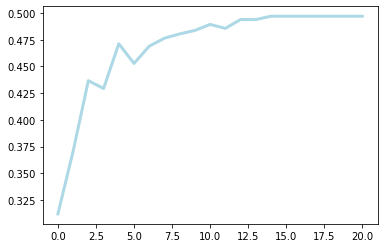

In [37]:
plt.plot(range(len(historico_mejor_fitness)), historico_mejor_fitness, color='lightblue', linewidth=3)
#plt.xlim(0.5, 4.5)
plt.show()

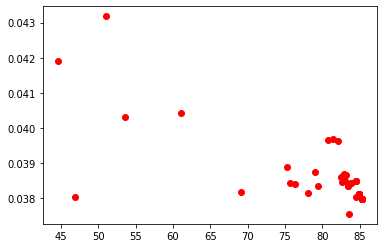

In [22]:
plt.plot(historico_mejor_fitness, riesgo, 'ro')